### Classificatin (Baskin Robbins nutritional information dataset)

- Learn from Aj. Prasert CBS
- Supervised Learning

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import csv data to dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/baskin_robbins_classifier.csv' # Aj.Prasert's github
df = pd.read_csv(url)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [3]:
df.shape

(70, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [5]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [6]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

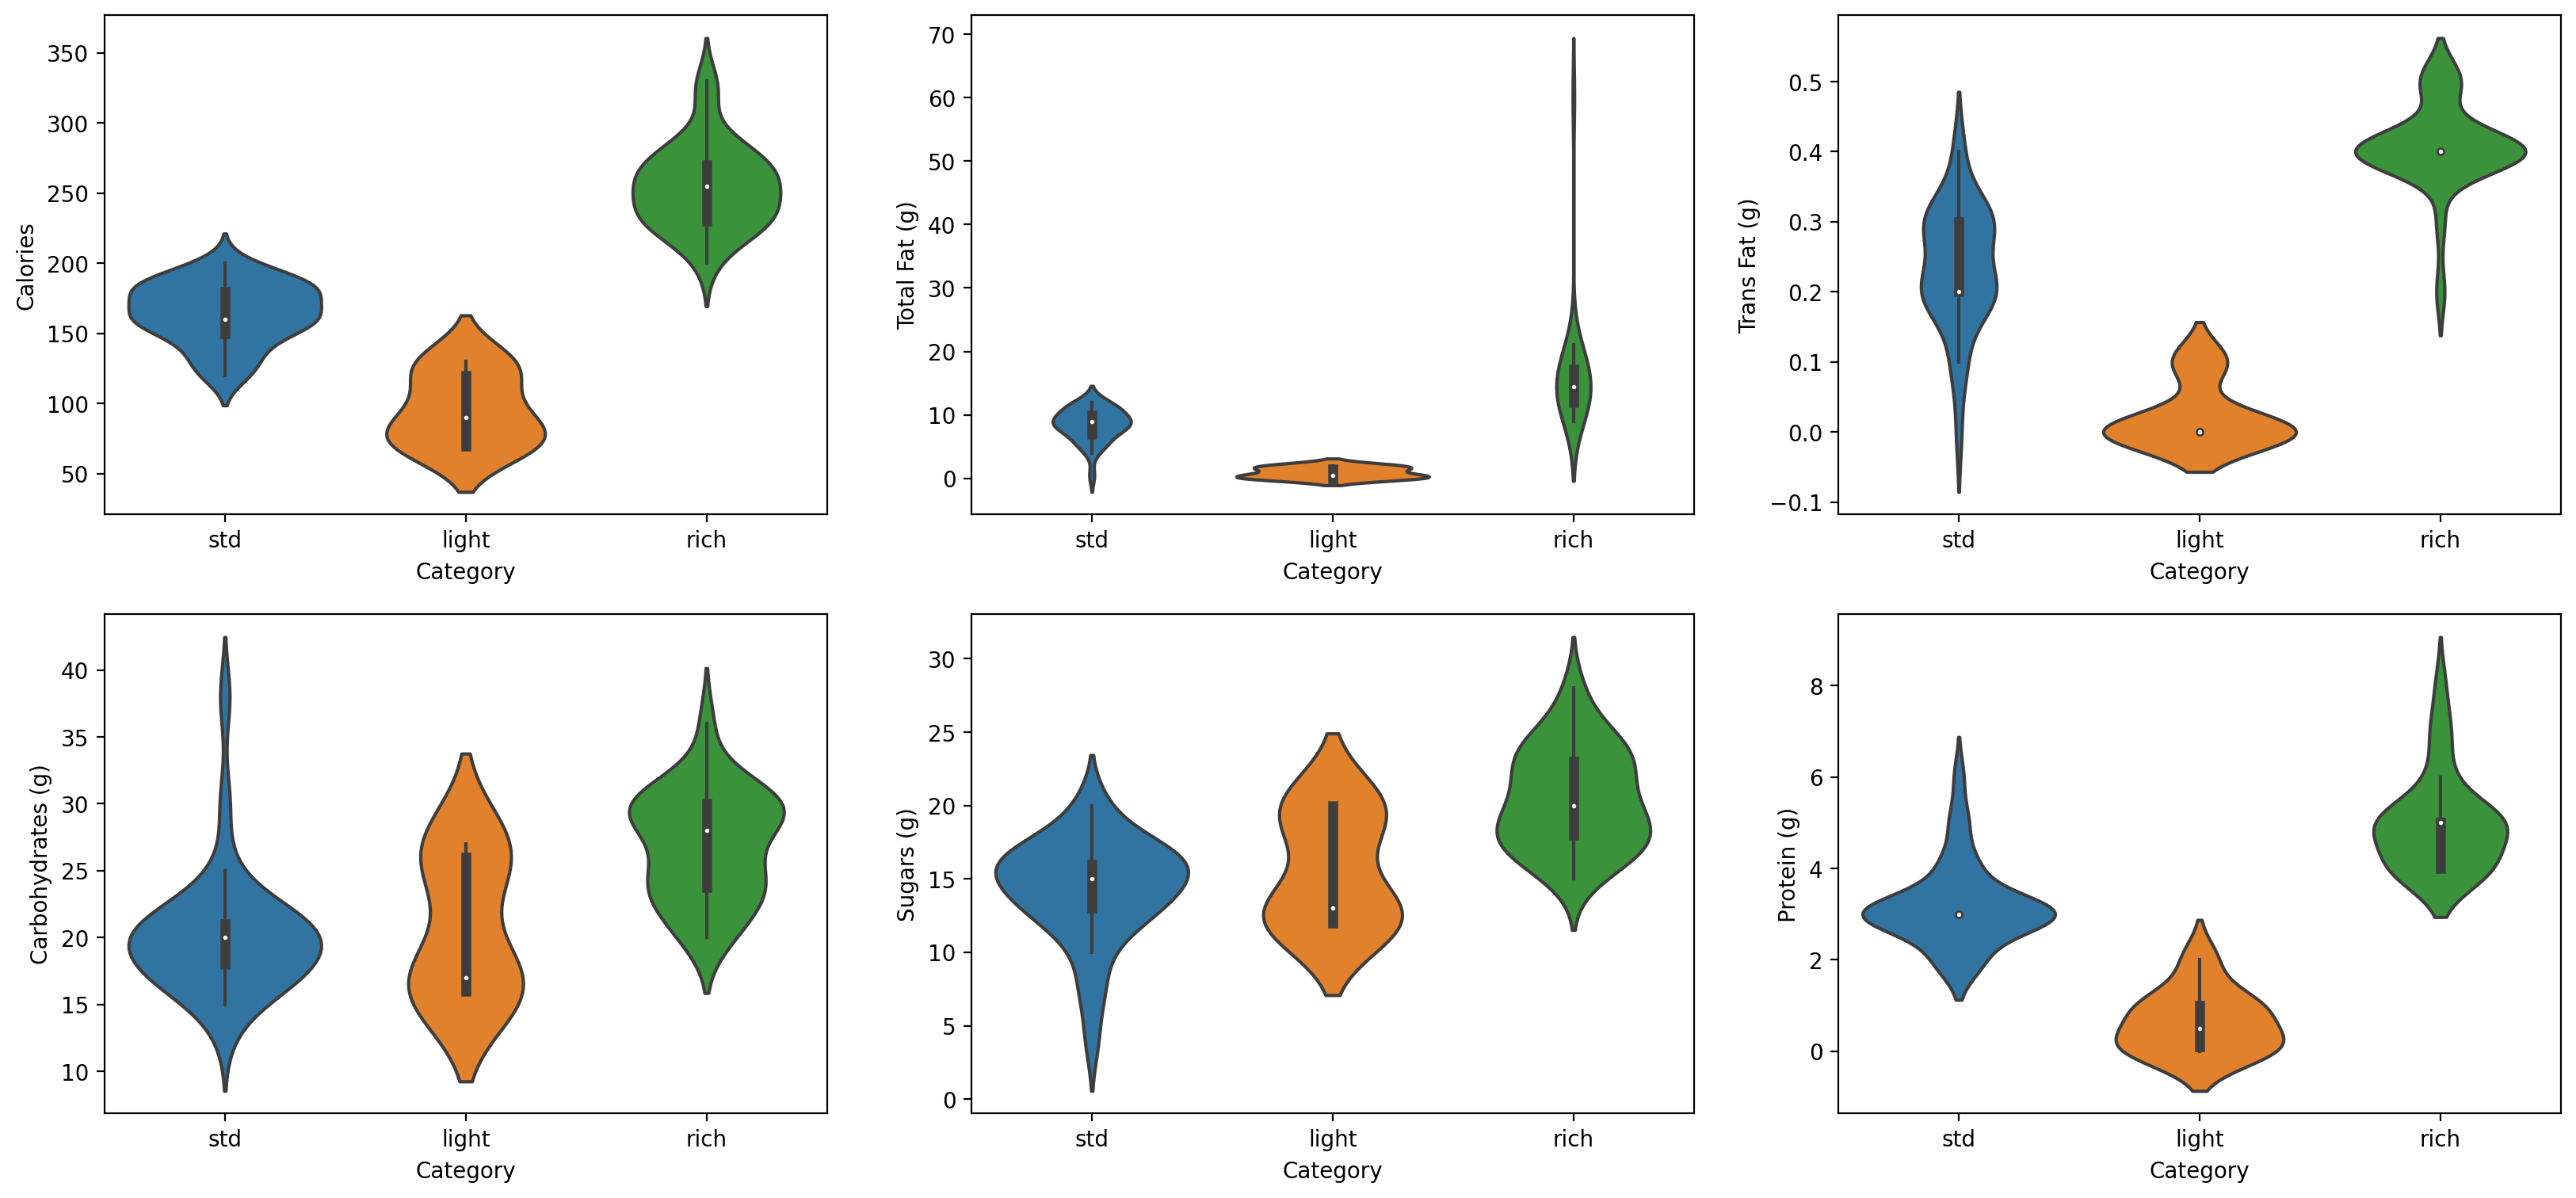

In [7]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 9))

ax = ax.ravel()

for i, col in enumerate(cols):
    sns.violinplot(data = df, x = 'Category', y = col, ax = ax[i])

### Draw Decision Tree

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [10]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [11]:
X = df[cols]
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


In [12]:
y = df['Category']
y.head()

0      std
1      std
2      std
3      std
4    light
Name: Category, dtype: object

In [13]:
# split data

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 6), (14, 6), (56,), (14,))

In [14]:
len(X_test)/len(df)

0.2

In [15]:
tree = DecisionTreeClassifier(criterion = 'gini') # create a model - gini is a default
# tree = DecisionTreeClassifier(criterion = 'entropy')

In [16]:
tree.fit(X_train, y_train) # fit/train a model

DecisionTreeClassifier()

In [17]:
tree.feature_importances_

array([0.62367944, 0.31901352, 0.        , 0.        , 0.05730704,
       0.        ])

In [18]:
fs = pd.Series(tree.feature_importances_, index = X_train.columns).sort_values(ascending = True)
fs

Trans Fat (g)        0.000000
Carbohydrates (g)    0.000000
Protein (g)          0.000000
Sugars (g)           0.057307
Total Fat (g)        0.319014
Calories             0.623679
dtype: float64

In [19]:
y_train.value_counts()

std      26
rich     23
light     7
Name: Category, dtype: int64

In [20]:
import sklearn
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.0


In [30]:
from sklearn.tree import plot_tree

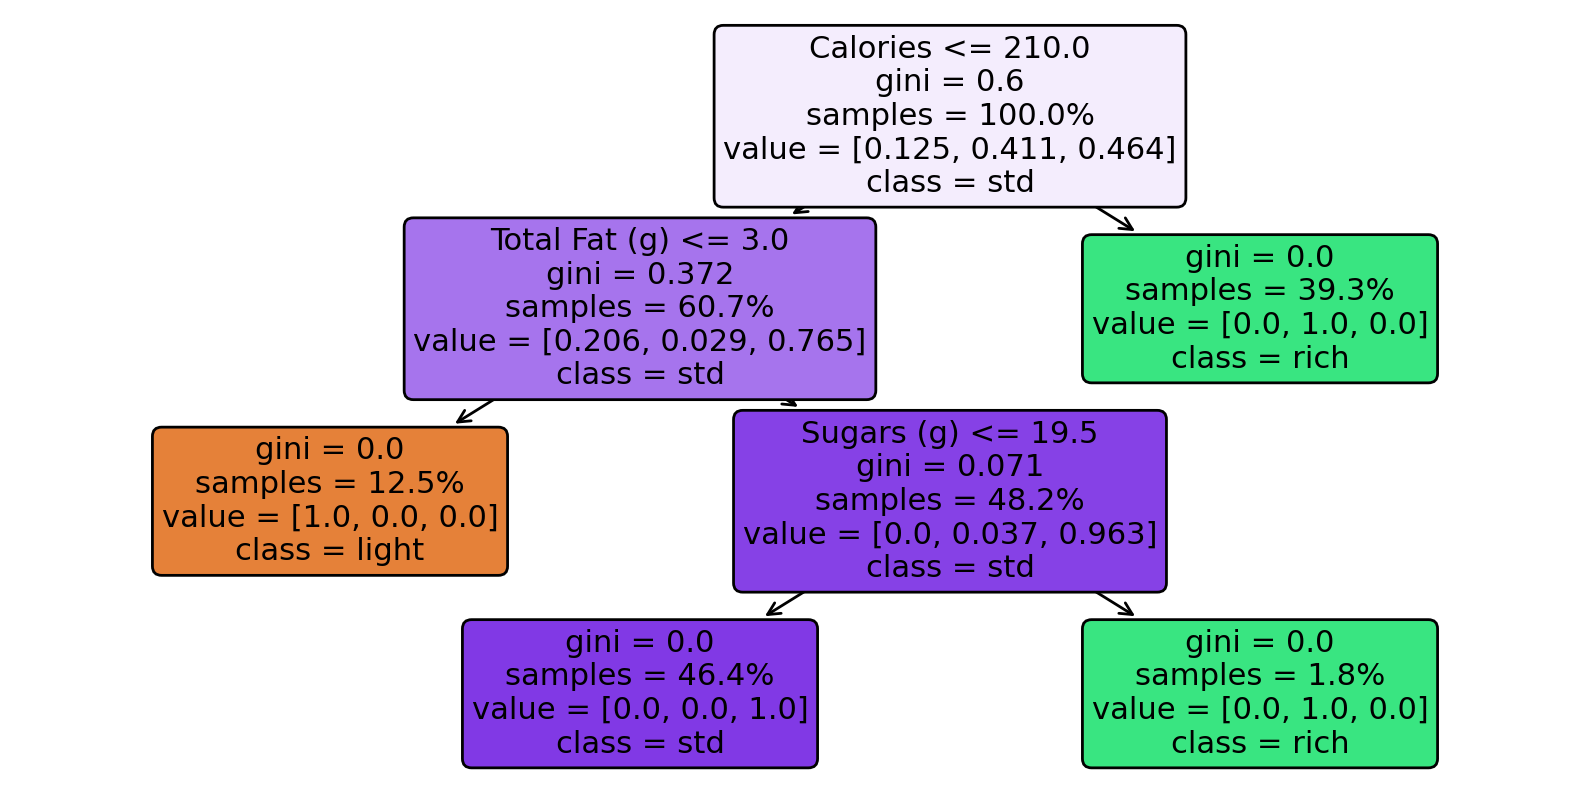

In [34]:
plt.figure(figsize=(10, 5))
plot_tree(tree,
          feature_names = cols,
          class_names = ['light', 'rich', 'std'],
          rounded = True, # Rounded node edges
          filled = True, # Adds color according to class
          proportion = True); # Displays the proportions of class samples instead of the whole number of samples

In [35]:
tree.tree_.impurity # gini

array([0.60012755, 0.37197232, 0.        , 0.07133059, 0.        ,
       0.        , 0.        ])

In [36]:
tree.tree_.value

array([[[ 7., 23., 26.]],

       [[ 7.,  1., 26.]],

       [[ 7.,  0.,  0.]],

       [[ 0.,  1., 26.]],

       [[ 0.,  0., 26.]],

       [[ 0.,  1.,  0.]],

       [[ 0., 22.,  0.]]])

In [38]:
# import registers the 3D projection, but is otherwise unused

from mpl_toolkits.mplot3d import Axes3D

In [40]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

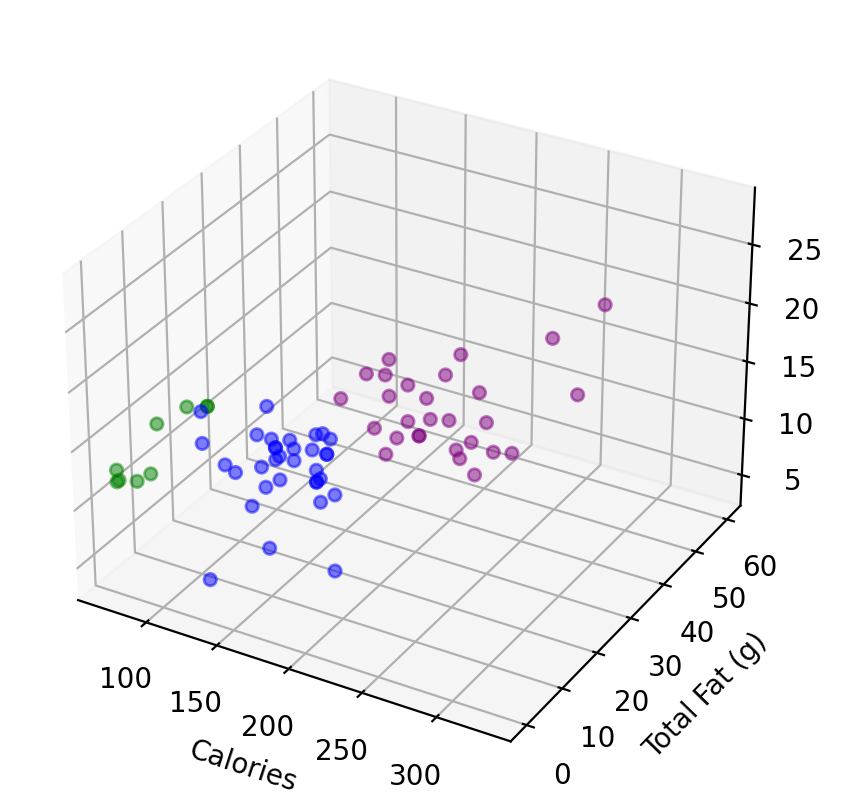

In [43]:
fig = plt.figure(figsize = (5, 5))

ax = fig.add_subplot(111, projection = '3d')
colors = y.map({'light': 'green', 'std': 'blue', 'rich': 'purple'})

ax.scatter(X['Calories'], X['Total Fat (g)'], X['Sugars (g)'], alpha = .5, c = colors)
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g)')
ax.set_zlabel('Sugars (g)');

In [45]:
y_pred = tree.predict(X_test)
y_pred

array(['light', 'rich', 'std', 'rich', 'rich', 'std', 'std', 'rich',
       'rich', 'light', 'std', 'std', 'light', 'rich'], dtype=object)

In [46]:
pd.crosstab(y_test, y_pred)

col_0,light,rich,std
Category,,,
light,2,0,0
rich,0,5,0
std,1,1,5


# pls learn how to use

- %matplotlib qt # Make plots appear as a pop up window, chose the backend: 'gtk', 'inline', 'osx', 'qt', 'qt4', 'tk', 'wx'
- %matplotlib inline # or inline the notebook (no panning, zooming through the plot). Not working in IPython 0.x